<a href="https://colab.research.google.com/github/Vishal-74/SalesPredictionProject/blob/main/Adv_Sales_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
dataset = pd.read_csv('advertising.csv')
dataset.shape

Saving advertising.csv to advertising.csv


(200, 4)

# Data Preprocessing

In [ ]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Data Visualisation

<Axes: >

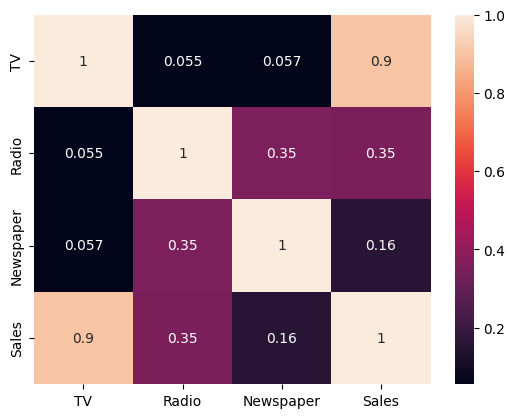

In [ ]:
import seaborn as sns
df = dataset.corr()
sns.heatmap(df,annot=True)

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

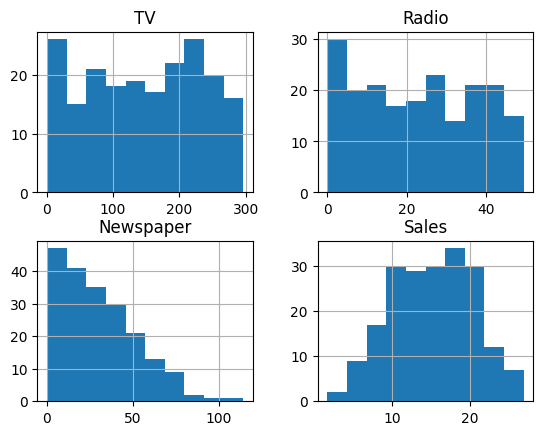

In [ ]:
dataset.hist()

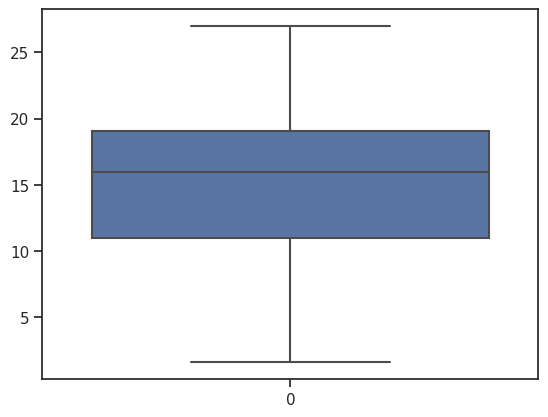

In [ ]:
sns.boxplot(dataset['Sales'])
plt.show()

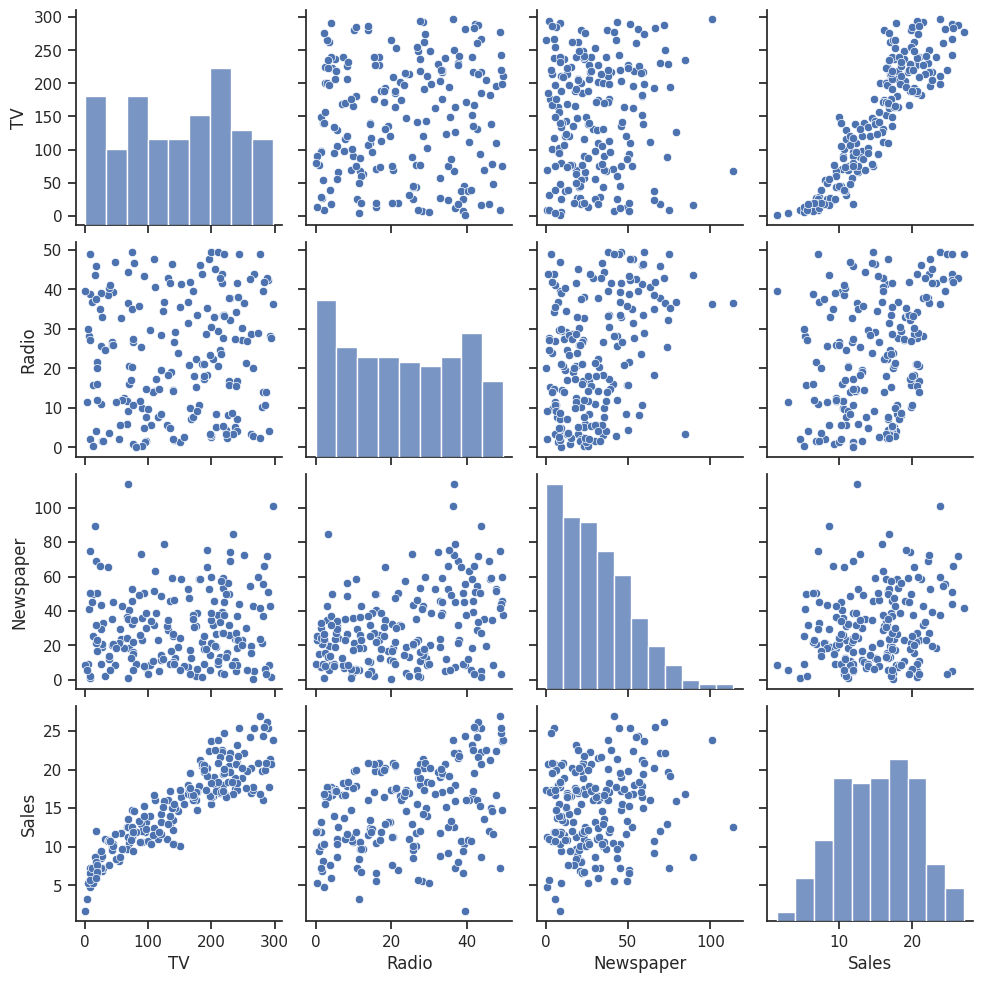

In [ ]:
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset)
plt.show()

# Model Training
Linear Regression


In [ ]:
X = dataset.drop('Sales', axis=1)
Y = pd.DataFrame(dataset['Sales'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=7)

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score 0.9197715123810873
RMSE: 1.5265964378659984


# Metrics to evaluate a linear regression model
evaluation metrics like R-squared (R2), Root Mean Square Error (RMSE), and Mean Absolute Error (MAE) are used because they quantify the degree of closeness between predicted and actual values on a continuous scale. These metrics provide insights into the quality of the model's predictions and its ability to explain variance in the data.

**R2** **SCORE** or coefficient of determination is a statistical measure used to evaluate the goodness of fit of a regression model.

*   0<R2<1
*   R2 == 1 --> best fit
*   R2 == 0 --> poor fit

It measure of how well the independent variables in a regression model explain the variability in the dependent variable

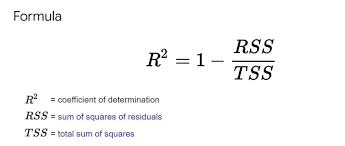

**RMSE** - measures the average magnitude of the errors or the differences between predicted values and actual values in a dataset.


1.   Calculate Residuals
2.   Square Residuals
3.   Calculate Mean of Squared Residuals
4.   Take the Square Root

RMSE provides a measure of how much, on average, the model's predictions differ from the actual observed values.

{the difference between the predicted value (from your model) and the actual observed value (ground truth). These differences are called "residuals" or "errors."}

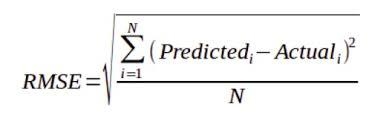

**MAE** is similar to RMSE but uses the absolute differences instead of squared differences. It's another measure of prediction accuracy.